<a href="https://colab.research.google.com/github/camnavarro/DTMC-Customer-Contract-Stages/blob/main/CASO_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CASO 1 PROCESOS ESTOCÁSTICOS**

Paula Valencia, Laura Viviana Vargas, Juan Diego Hernandez, Camilo Navarro

Instalamos paquetes y bibliotecas:

In [ ]:
install.packages("markovchain")
library(markovchain)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘igraph’, ‘matlab’, ‘expm’, ‘RcppParallel’, ‘RcppArmadillo’


Package:  markovchain
Version:  0.8.5-4
Date:     2021-01-07
BugReport: https://github.com/spedygiorgio/markovchain/issues




Cargamos archivos:

In [ ]:
DatosNoviembre<- read.csv("https://drive.google.com/uc?export=download&id=19xFgDcK00h1ZUmMewxdevyzyU5AH1cZx", 
                          sep=",", dec=".")
DatosDiciembre<- read.csv("https://drive.google.com/uc?export=download&id=1RXf0_Ej0EmU1AgQAi0X-0wJRHdjkaKjk", 
                          sep=",", dec=".")
DatosEnero<- read.csv("https://drive.google.com/uc?export=download&id=1aBPwIivuv-6V6ZzpNfiy8EOJ3LyEsopT", 
                      sep=",", dec=".")

**1. Explique según el contexto del caso si la transición entre las etapas de cada oportunidad  podría modelarse usando una cadena de Markov de orden 1.**

Teniendo en cuenta el enunciado del caso y los datos, no se tiene suficiente información para afirmar que una cadena mayor que orden 1 podria ser más precisa o no. Por ejemplo, si un cliente se encuentra en el estado B, no se sabe si influye el hecho de que ese cliente estuvo antes en A o en B. Ademas, Marc Smith esta unicamente interesado en saber las probabilidad de absorción; no le importa saber cuantas veces estuvo un cliente en un estado, sino que solo le interesa saber el porcentaje de contratos ganados o perdidos a largo plazo. Sin embargo, tocaría ver si una cadena de orden dos arroja una probabilidad de absorcion muy diferente. Ademas, se necesitarían más insights del comportamiento de las oportunidades de negocios si es que se quiere considerar una cadena de orden 2 o más. 


**2. Los datos adjuntos corresponden a una muestra de algunas oportunidades de cada mes.  Con cada conjunto de datos.**

***a. Construya la matriz de frecuencias y realice estadística descriptiva.***

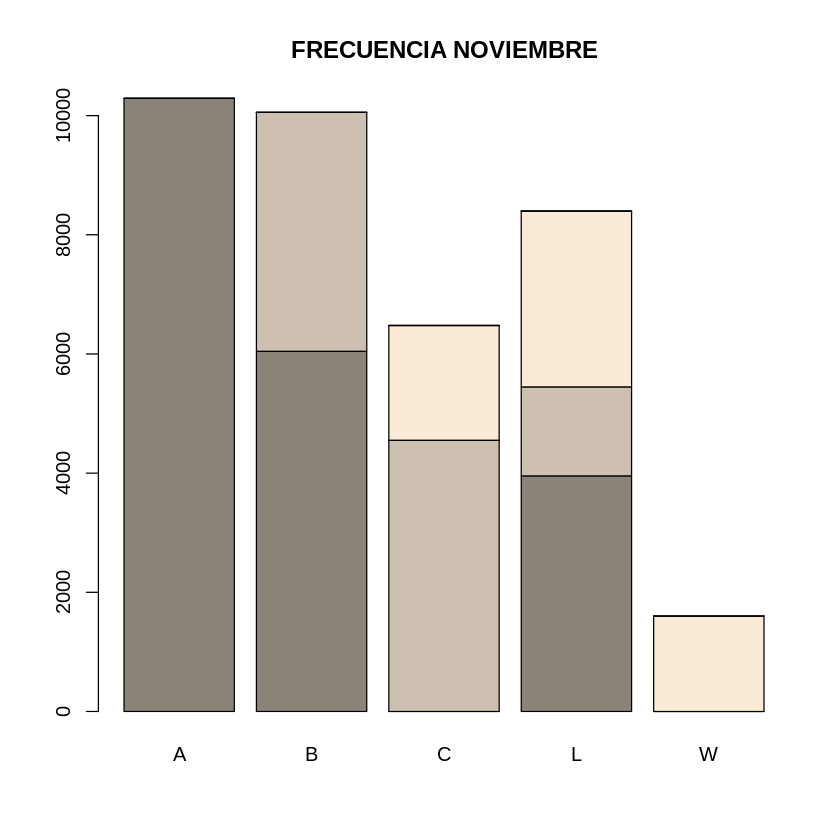

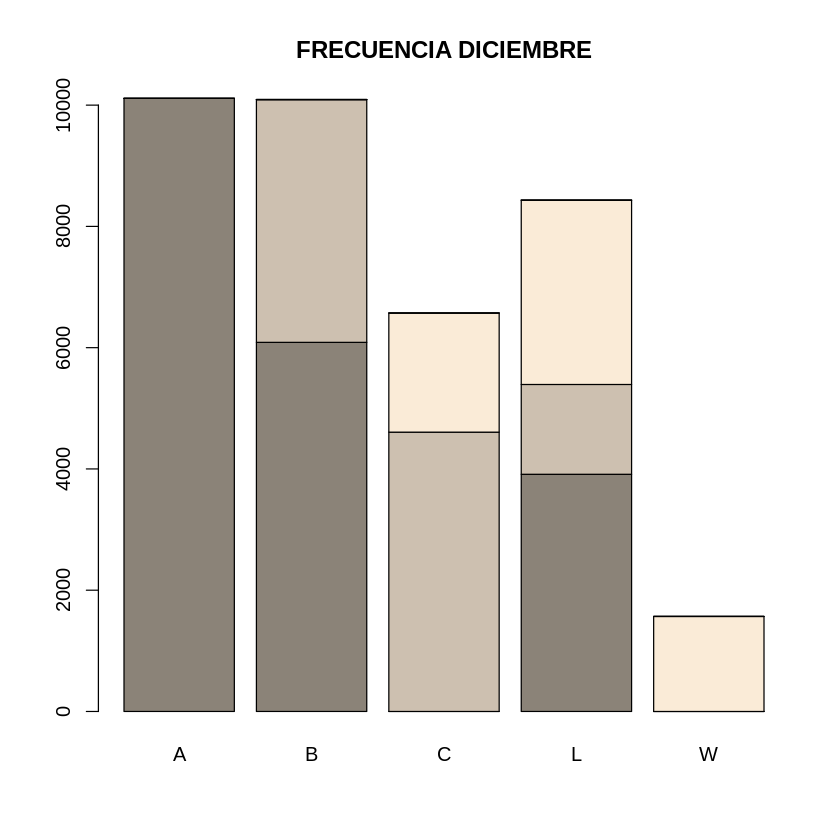

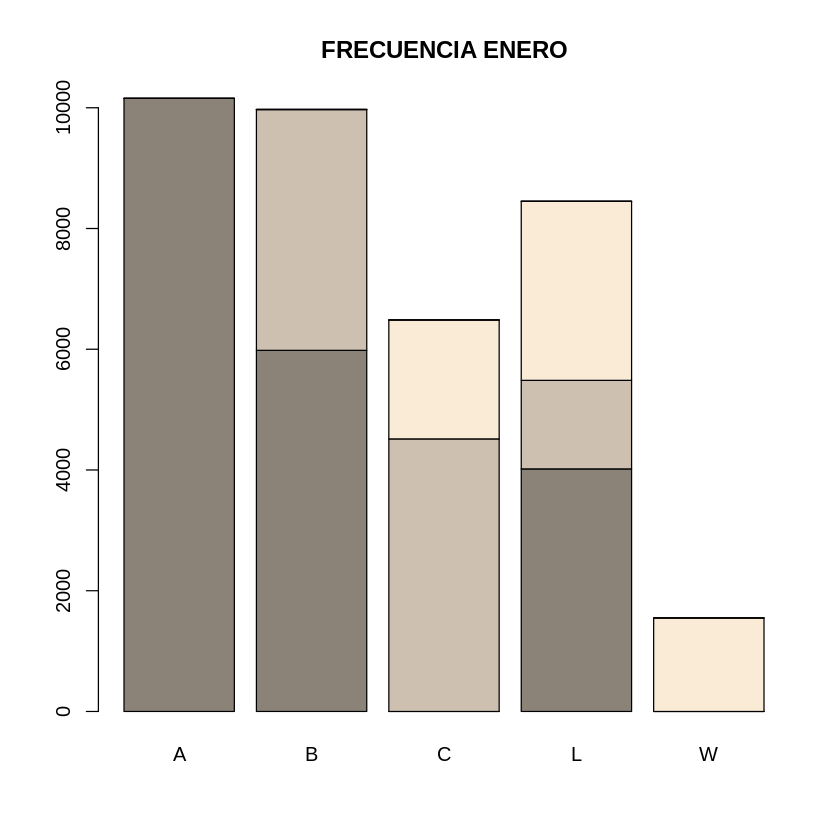

In [ ]:
#Se declaran las "secuencias iniciales", estas aun no han sido divididas 
#por cliente
Seq_Nov_Inicial<-DatosNoviembre[,2]
Seq_Dic_Inicial<-DatosDiciembre[,2]
Seq_Ene_Inicial<-DatosEnero[,2]

#Se separa la secuencia por cliente
Seq_Nov <- split(DatosNoviembre$Secuencia, DatosNoviembre$Cliente, drop=FALSE)
Seq_Dic <- split(DatosDiciembre$Secuencia, DatosDiciembre$Cliente, drop=FALSE)
Seq_Ene <- split(DatosEnero$Secuencia, DatosEnero$Cliente, drop=FALSE)

#Se crean las matrices de frecuencia
Frec_Nov<-createSequenceMatrix(Seq_Nov)
Frec_Dic<-createSequenceMatrix(Seq_Dic)
Frec_Ene<-createSequenceMatrix(Seq_Ene)

#Graficamos
Bar_Nov<-barplot(Frec_Nov, main="FRECUENCIA NOVIEMBRE", 
                 col=c("antiquewhite4", "antiquewhite3", "antiquewhite"))
Bar_Dic<-barplot(Frec_Dic, main="FRECUENCIA DICIEMBRE", 
                 col=c("antiquewhite4", "antiquewhite3", "antiquewhite"))
Bar_Ene<-barplot(Frec_Ene, main="FRECUENCIA ENERO", 
                 col=c("antiquewhite4", "antiquewhite3", "antiquewhite"))

Una vez construimos las matrices de frecuencia de cada mes, podemos hacer un diagrama de barras a partir de estas. Para leer la grafica es necesario entender que el Eje horizontal es el estado al que llega la oportunidad despues de una transicion, y el eje vertical la frecuencia ; Por otro lado cada color tiene su significado , El primer color que podemos apreciar "antiquewhite4" (El mas oscuro) es  el estado del cual parte el cliente , por lo tanto podemos ver en la primera barra la frecuencia que pasa del estado A al estado A , luego vemos los estados que pasan del estado A y terminan en el estado B. Asi para cada uno de los colores. El orden para comprender el estado desde el que parten es el siguiente:
1. "antiquewhite4"<- Parte del estado A
2. "antiquewhite3"<- Parte del estado B
3. "antiquewhite"<- Parte del estado C
4. Los estados L y w no se aprecian graficamente ya que son estados absorbentes y no podemos partir de estos.

Dando un vistazo rapido a cada uno de los graficos de las frecuencias podemos ver que entre ellos son muy semejantes lo que nos puede dar a entender que el comportamiento de los clientes a travez de los meses es parecido.
Con el grafico podemos observar varias cosas. Primero, vemos que en todos los meses, es mas probable ir de A a L y de C a L; ir de B a L no es tan comun. De igual forma, vemos que hay más oportunidades que pasan de C a L que de C a W, y teniendo en cuenta que tambien hay transiciones de A a L y de B a L, decimos que en general hay mas oportunidades que se pierden. 

***b. Estime una cadena de Markov de orden 1.***

In [ ]:
#Se declaran los estados de la variable
Estados<- c("A", "B", "C", "L", "W")

#Se crean las matrices de transicion y las DTCM
#Se deben modificar las matrices de transicion obtenidas
#para poder poner los "1" en la diagonal principal en los estados
#absorbentes

#NOVIEMBRE
Trans_Nov<-Frec_Nov/rowSums(Frec_Nov)

Trans_Nov[4,4]<-1
Trans_Nov[5,5]<-1
Trans_Nov[4,1]<-0
Trans_Nov[4,2]<-0
Trans_Nov[4,3]<-0
Trans_Nov[4,5]<-0
Trans_Nov[5,1]<-0
Trans_Nov[5,2]<-0
Trans_Nov[5,3]<-0
Trans_Nov[5,4]<-0

mcNoviembre<-new("markovchain", states=Estados, byrow=TRUE, 
                 transitionMatrix=Trans_Nov, name="Noviembre")


#DICIEMBRE
Trans_Dic<-Frec_Dic/rowSums(Frec_Dic)
Trans_Dic[4,4]<-1
Trans_Dic[5,5]<-1
Trans_Dic[4,1]<-0
Trans_Dic[4,2]<-0
Trans_Dic[4,3]<-0
Trans_Dic[4,5]<-0
Trans_Dic[5,1]<-0
Trans_Dic[5,2]<-0
Trans_Dic[5,3]<-0
Trans_Dic[5,4]<-0

mcDiciembre<-new("markovchain", states=Estados, byrow=TRUE, 
                 transitionMatrix=Trans_Dic, name="Diciembre")

#ENERO
Trans_Ene<-Frec_Ene/rowSums(Frec_Ene)
Trans_Ene[4,4]<-1
Trans_Ene[5,5]<-1
Trans_Ene[4,1]<-0
Trans_Ene[4,2]<-0
Trans_Ene[4,3]<-0
Trans_Ene[4,5]<-0
Trans_Ene[5,1]<-0
Trans_Ene[5,2]<-0
Trans_Ene[5,3]<-0
Trans_Ene[5,4]<-0

mcEnero<-new("markovchain", states=Estados, byrow=TRUE, 
                 transitionMatrix=Trans_Ene, name="Enero")

#Imprimimos las cadenas y vemos su respectivo resumen
mcNoviembre
summary(mcNoviembre)
"··"
"··"
mcDiciembre
summary(mcNoviembre)
"··"
"··"
mcEnero
summary(mcEnero)

Noviembre 
 A  5 - dimensional discrete Markov Chain defined by the following states: 
 A, B, C, L, W 
 The transition matrix  (by rows)  is defined as follows: 
          A         B         C         L         W
A 0.5071471 0.2979594 0.0000000 0.1948935 0.0000000
B 0.0000000 0.3987468 0.4527551 0.1484981 0.0000000
C 0.0000000 0.0000000 0.2973140 0.4555418 0.2471442
L 0.0000000 0.0000000 0.0000000 1.0000000 0.0000000
W 0.0000000 0.0000000 0.0000000 0.0000000 1.0000000


Noviembre  Markov chain that is composed by: 
Closed classes: 
L 
W 
Recurrent classes: 
{L},{W}
Transient classes: 
{A},{B},{C}
The Markov chain is not irreducible 
The absorbing states are: L W


[1] "··"

[1] "··"

Diciembre 
 A  5 - dimensional discrete Markov Chain defined by the following states: 
 A, B, C, L, W 
 The transition matrix  (by rows)  is defined as follows: 
          A         B         C         L         W
A 0.5027597 0.3027199 0.0000000 0.1945204 0.0000000
B 0.0000000 0.3967499 0.4565002 0.1467499 0.0000000
C 0.0000000 0.0000000 0.2988891 0.4626389 0.2384721
L 0.0000000 0.0000000 0.0000000 1.0000000 0.0000000
W 0.0000000 0.0000000 0.0000000 0.0000000 1.0000000


Noviembre  Markov chain that is composed by: 
Closed classes: 
L 
W 
Recurrent classes: 
{L},{W}
Transient classes: 
{A},{B},{C}
The Markov chain is not irreducible 
The absorbing states are: L W


[1] "··"

[1] "··"

Enero 
 A  5 - dimensional discrete Markov Chain defined by the following states: 
 A, B, C, L, W 
 The transition matrix  (by rows)  is defined as follows: 
          A         B         C         L         W
A 0.5038452 0.2967998 0.0000000 0.1993550 0.0000000
B 0.0000000 0.4000602 0.4528132 0.1471267 0.0000000
C 0.0000000 0.0000000 0.3037779 0.4573631 0.2388589
L 0.0000000 0.0000000 0.0000000 1.0000000 0.0000000
W 0.0000000 0.0000000 0.0000000 0.0000000 1.0000000


Enero  Markov chain that is composed by: 
Closed classes: 
L 
W 
Recurrent classes: 
{L},{W}
Transient classes: 
{A},{B},{C}
The Markov chain is not irreducible 
The absorbing states are: L W


Observamos que, a simple vista, las cadenas de cada mes parecen tener probabilidades de transicion sumamente parecida. Se podria decir con casi toda la seguridad de que al realizar la prueba de homogeneidad más adelante, saldrá que las cadenas son homogeneas.

***c. Realice el gráfico de estados e interprete los resultados.***

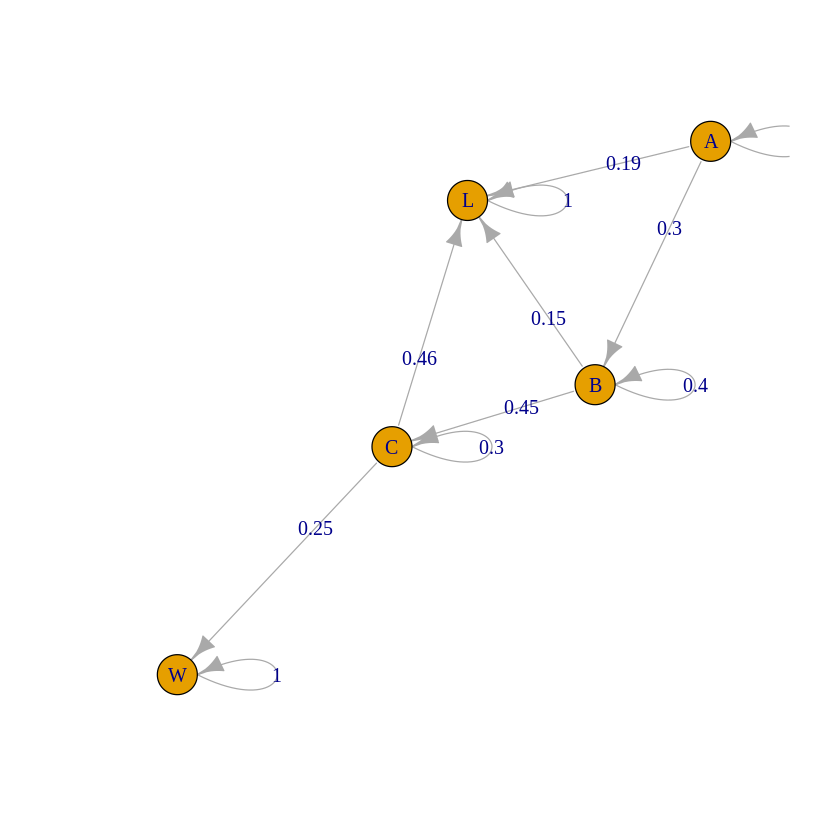

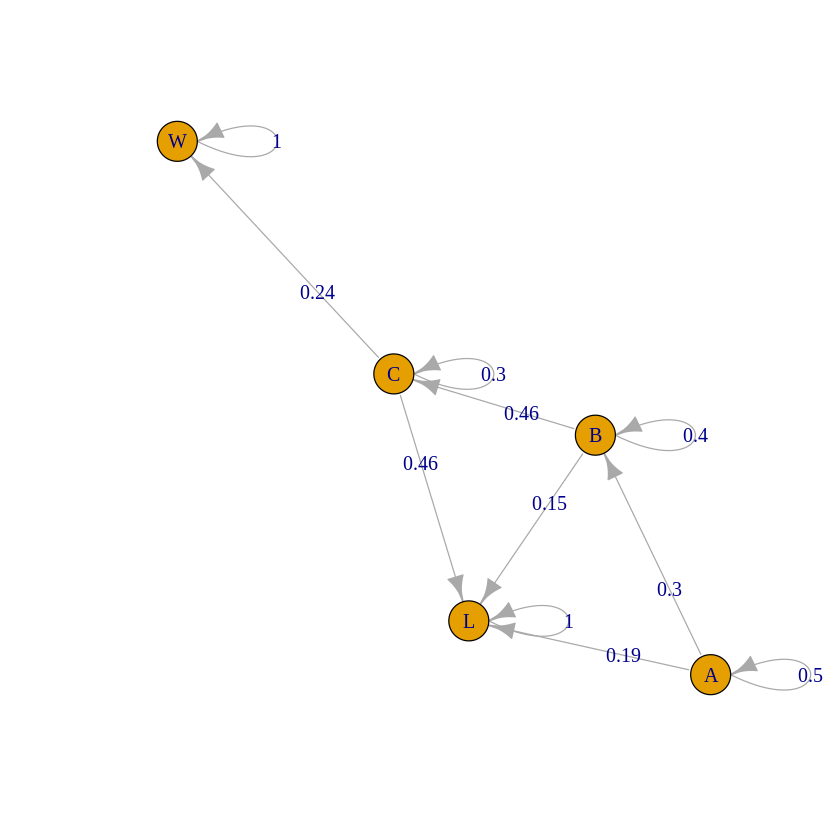

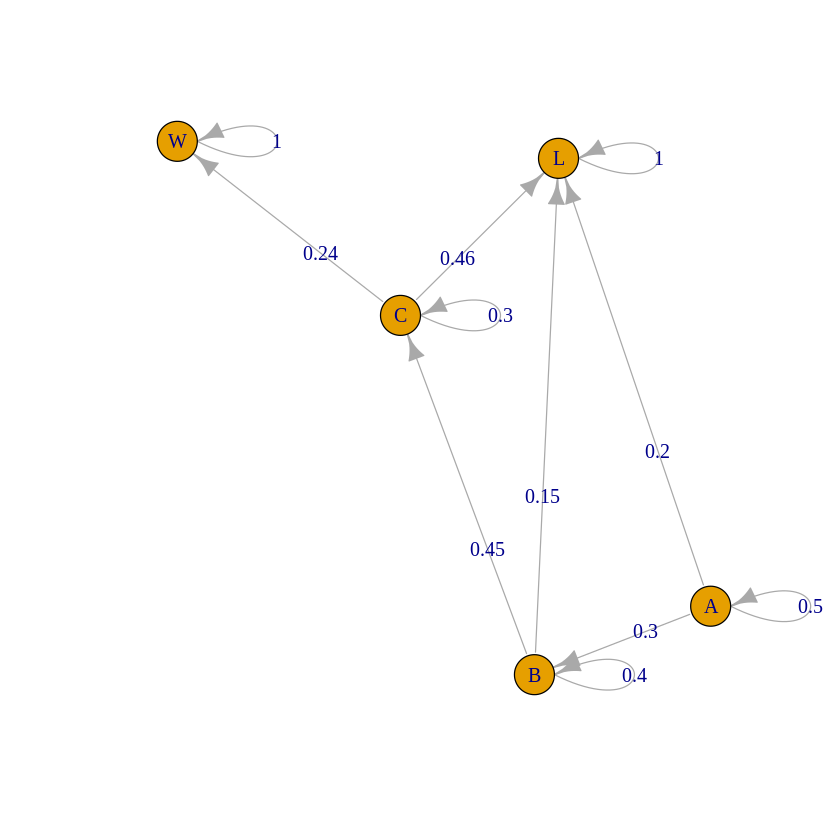

In [ ]:
#Graficamos las DTMC
PlotNov<-as(mcNoviembre, "markovchain")
plot(PlotNov)

PlotDic<-as(mcDiciembre, "markovchain")
plot(PlotDic)

PlotEne<-as(mcEnero, "markovchain")
plot(PlotEne)

Analisis 

Según los anteriores gráficos, se puede ver que las probabilidades son muy similares para todos los meses. Por esta razón, se analiza un sólo gráfico, donde se puede ver que el momento con mayor probabilidad de pérdida del contrato con una oportunidad de venta es en el estado C. Asimismo, estando en el estado A es más probable volver a saltar a él mismo que ir al estado B o al L. También se puede ver que el estado B tiene la probabilidad más baja de pérdida de contrato. Del mismo modo, confirmamos que los estados W y L son absorbentes, pues la probabilidad de ir de W a W o de L a L es 1. Finalmente se concluye que el camino para llegar al estado W es muy extenso y exiten muchas probabilidades de pérdida en el proceso. 

***d. Pruebe el supuesto de Markov***

In [ ]:
#Convrertir las listas en secuencias
#NOVIEMBRE
Secuencia_Nov<-Seq_Nov
for(i in 1:10000){
  Secuencia_Nov[[i]]<-c(Seq_Nov[i],NA)
}

Final_Noviembre<-unlist(Secuencia_Nov, use.names=FALSE)


verifyMarkovProperty(Final_Noviembre, verbose=TRUE)

#DICIEMBRE
Secuencia_Dic<-Seq_Dic
for(i in 1:10000){
  Secuencia_Dic[[i]]<-c(Seq_Dic[i],NA)
}

Final_Diciembre<-unlist(Secuencia_Dic, use.names=FALSE)

verifyMarkovProperty(Final_Diciembre, verbose=TRUE)


#ENERO
Secuencia_Ene<-Seq_Ene
for(i in 1:10000){
  Secuencia_Ene[[i]]<-c(Seq_Ene[i],NA)
}

Final_Enero<-unlist(Secuencia_Ene, use.names=FALSE)


verifyMarkovProperty(Final_Enero, verbose=TRUE)

Testing markovianity property on given data sequence
Chi - square statistic is: 3.398556 
Degrees of freedom are: 18 
And corresponding p-value is: 0.9999286 
Testing markovianity property on given data sequence
Chi - square statistic is: 12.00375 
Degrees of freedom are: 17 
And corresponding p-value is: 0.79991 
Testing markovianity property on given data sequence
Chi - square statistic is: 2.476112 
Degrees of freedom are: 17 
And corresponding p-value is: 0.9999829 


En base a los resultados de la prueba del supuesto de Markov en cada mes se puede inferir que no se rechaza el supuesto al obtener en cada prueba un p-value mayor a la significancia de 0.05. Resultados que indican independencia entre los eventos de las tres cadenas.

 **3. Use une prueba de homogeneidad entre las cadenas de Markov de cada mes para analizar
si es posible crear una única cadena de Markov.**

In [ ]:
#Prueba de Homogeneidad

Lista<-list(Frec_Nov, Frec_Dic, Frec_Ene)
verifyHomogeneity(Lista, verbose=TRUE)

Warning message in verifyHomogeneity(Lista, verbose = TRUE):
“The accuracy of the statistical inference functions has been questioned. It will be thoroughly investigated in future versions of the package.”


Testing homogeneity of DTMC underlying input list 
ChiSq statistic is 7.617377 d.o.f are 48 corresponding p-value is 1 


$statistic
[1] 7.617377

$dof
[1] 48

$pvalue
[1] 1

El resultado de la prueba de homogeneidad entre las cadenas arroja un p-value mayor a la significancia de 0.05 por lo que no se rechaza la hipótesis y confirma que es posible crear una única cadena agregada de los tres meses, ya que las probabilidades de transición no dependen del instante de tiempo en el que se inicie la transición.

**4. Construya la matriz agregada con todos los meses.**

In [ ]:
#Secuencia Agregada y matriz agregada
Secuencia_Agregada<-c(Final_Noviembre, Final_Diciembre, Final_Enero)


Frecuencia_Agregada<-createSequenceMatrix(Secuencia_Agregada)

Trans_Agr<-Frecuencia_Agregada/rowSums(Frecuencia_Agregada)


Trans_Agr[4,4]<-1
Trans_Agr[5,5]<-1
Trans_Agr[4,1]<-0
Trans_Agr[4,2]<-0
Trans_Agr[4,3]<-0
Trans_Agr[4,5]<-0
Trans_Agr[5,1]<-0
Trans_Agr[5,2]<-0
Trans_Agr[5,3]<-0
Trans_Agr[5,4]<-0

mcAgregada<-new("markovchain", states=Estados, byrow=TRUE, 
                 transitionMatrix=Trans_Agr, name="Agregada")

mcAgregada
summary(mcAgregada)

Agregada 
 A  5 - dimensional discrete Markov Chain defined by the following states: 
 A, B, C, L, W 
 The transition matrix  (by rows)  is defined as follows: 
          A         B         C         L         W
A 0.5045909 0.2991545 0.0000000 0.1962546 0.0000000
B 0.0000000 0.3985125 0.4540293 0.1474582 0.0000000
C 0.0000000 0.0000000 0.2999898 0.4585338 0.2414764
L 0.0000000 0.0000000 0.0000000 1.0000000 0.0000000
W 0.0000000 0.0000000 0.0000000 0.0000000 1.0000000


Agregada  Markov chain that is composed by: 
Closed classes: 
L 
W 
Recurrent classes: 
{L},{W}
Transient classes: 
{A},{B},{C}
The Markov chain is not irreducible 
The absorbing states are: L W


**5. Responda y analice las siguientes preguntas**


 ***a. ¿Cuál es la probabilidad de que una oportunidad pase dos transiciones en la etapa **
A, después pase inmediatamente a la etapa B y de ahí se demore 5 transiciones en
ser ganada? ***

In [ ]:
install.packages("expm")
library(expm)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Matrix


Attaching package: ‘expm’


The following object is masked from ‘package:Matrix’:

    expm




Necesitamos una transicion de A a A, luego una de A a B, luego, en 4 transiciones de B a C para que en una transicion se pueda ir de C a W. Asi, aseguramos que de B a W hubo 5 transiciones

 $$P(X_7=W, X_2=B, X_1=A | X_0=A ) = P(X_1=A |X_0=A)*P(X_2=B |X_1=A)*P(X_6=C |X_2=B)*P(X_7=W |X_6=C)$$ 



In [ ]:
Trans_Agr

,A,B,C,L,W
A,0.5045909,0.2991545,0.0000000,0.1962546,0.0000000
B,0.0000000,0.3985125,0.4540293,0.1474582,0.0000000
C,0.0000000,0.0000000,0.2999898,0.4585338,0.2414764
L,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000
W,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000


Calculamos las probabilidades que son a un salto:
$$P(X_1=A |X_0=A)=0.5046$$
$$P(X_2=B |X_1=A)=0.2992$$
$$𝑃(𝑋_7=𝑊|𝑋_6=𝐶)=0.2415$$

In [ ]:
Trans_Agr4<-Trans_Agr%^%4
Trans_Agr4

,A,B,C,L,W
A,0.06482728,0.11169375,0.132487080,0.6187337,0.07225816
B,0.00000000,0.02522131,0.078906465,0.6692674,0.22660484
C,0.00000000,0.00000000,0.008098894,0.6497337,0.34216744
L,0.00000000,0.00000000,0.000000000,1.0000000,0.00000000
W,0.00000000,0.00000000,0.000000000,0.0000000,1.00000000


$$P(X_6=C |X_2=B)=0.0789$$

Respuesta:

In [ ]:
Trans_Agr[1,1]*Trans_Agr[1,2]*Trans_Agr4[2,3]*Trans_Agr[3,5]

[1] 0.002876221

0.29%

 ***b. ¿Cuál es la probabilidad de que una oportunidad en la etapa A termine siendo
ganada después de tres etapas?***

Para que una oportunidad en la etapa A sea ganada despues de tres etapas se debe dar la secuencia A-B-C-W, ninguna otra secuencia cumple el supuesto de que sea ganada despues de tres etapas.

 $$P(X_3=W, X_2=C, X_1=B | X_0=A )=𝑃(𝑋_1=B|𝑋_0=𝐴)∗𝑃(𝑋_2=C|𝑋_1=B)∗𝑃(𝑋_3=W|𝑋_2=C)$$

Respuesta:
$$P(X_1=B |X_0=A)=0.2992$$
$$P(X_2=C |X_1=B)=0.4540$$
$$𝑃(𝑋_3=𝑊|𝑋_2=𝐶)=0.2415$$

In [ ]:
Trans_Agr[1,2]*Trans_Agr[2,3]*Trans_Agr[3,5]

[1] 0.03279851

3.28%

 ***c. Realice un gráfico que muestre cómo cambia la probabilidad anterior si se calcula
desde tres a diez etapas, pA−Won
(3)
, pA−Won
(4)
, ... , pA−Won
(10)
. Analice los resultados.***

Primero, debemos entender que una trayectoria A-W en n etapas implica que debe haber una trayectoria A-C en n-1 etapas. Por ejemplo, A-W en 5 etapas debe ser desglozado como A-C en 4 etapas y C-W en 1 etapa. Podemos crear entonces una funcion que tenga como argumento el numero de etapas desde el cual la probabilidad A-W se desea calcular, y que retorne la probabilidad de esta trayectoria en las respectivas etapas.


In [ ]:
#Creamos la función
Paw<-function(n){
  M<-Trans_Agr%^%(n-1)
  j<-M[1,3]*Trans_Agr[3,5]
  return(j)
}

#Confirmamos que la funcion sirve ingresando 3 etapas. Deberia dar el mismo
#resultado del punto "b"
Paw(3)



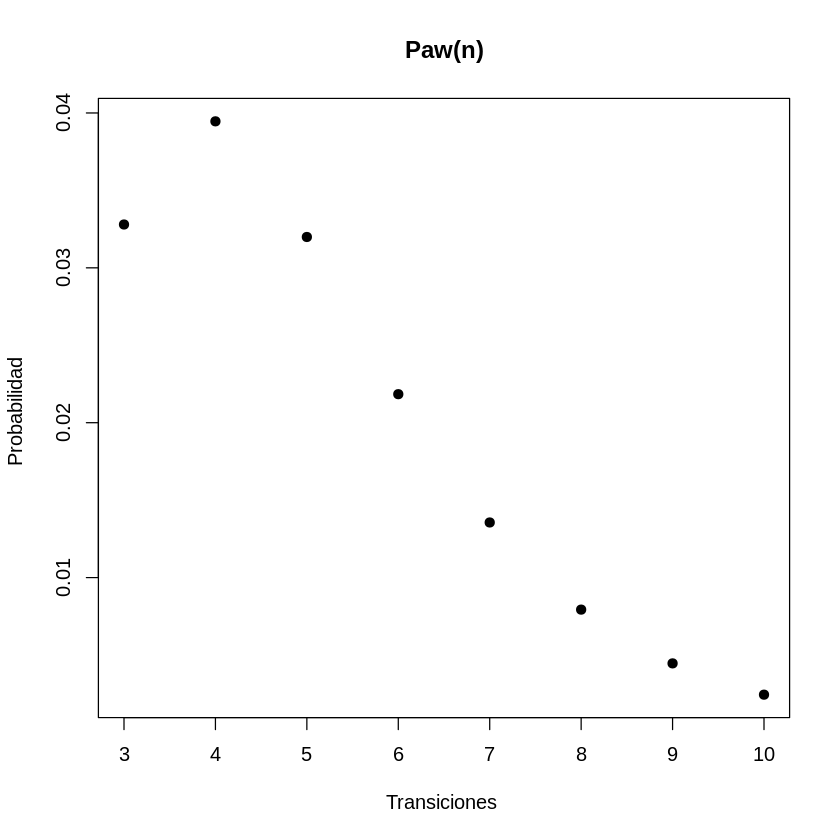

In [ ]:
#Una vez confirmamos que la funcion sirve, podemos llenar un vector con los
#distinntos valores de la funcion, usando de 3 a 10 etapas

vec<-vector()

num<-c(3,4,5,6,7,8,9,10)


for(k in num){

    vec[k-2]<-Paw(k)
}


plot(num, vec, main="Paw(n)",
   xlab="Transiciones ", ylab="Probabilidad ", pch=19)

Observando el grafico de la funcion $$P_{aw}(n), 3≤n≤10$$ podemos decir que es mas probable que, partiendo desde la etapa A, una oportunidad de negocio se de como ganada en 4 transiciones exactamente. La probabilidad de que se de exatamente en 3 y en 5 es muy parecida. Del mismo modo, a partir de 4 transiciones, a medida que el numero de transiciones necesarias aumenta, la probabilidad de que la oportunidad de negocios se de como ganada empieza a disminuir. En cuanto a recomendaciones para la empresa WSES, podriamos decir que esta debe intentar que las transiciones necesarias para que una oportunidad de negocios sea ganada este entre 3 y 5 transiciones, preferiblemente en 4. Si el numero de transiciones es mayor a 5, será menos probable que la oportunidad de negocios surga.

 ***d. En el largo plazo, ¿cuál es la probabilidad de que una oportunidad llegue a C y
termine por ser perdida?***

In [ ]:
absAgr<-absorptionProbabilities(mcAgregada)
absAgr

,L,W
A,0.8427614,0.1572386
B,0.7396081,0.2603919
C,0.6550388,0.3449612


Respuesta:

In [ ]:
absAgr[3,1]

[1] 0.6550388

65.50%

**6. Obtenga las probabilidades de absorción y tiempos esperados de absorción.**

In [ ]:
#Sacamos las probabilidades de absorcion para cada mes y para la matriz agregada
absNov<-absorptionProbabilities(mcNoviembre)
absDic<-absorptionProbabilities(mcDiciembre)
absEne<-absorptionProbabilities(mcEnero)
absAgr<-absorptionProbabilities(mcAgregada)

"Noviembre"
absNov

"Diciembre"

"Enero"

absEne
"M. Agregada"

absAgr



[1] "Noviembre"

,L,W
A,0.8398840,0.1601160
B,0.7351530,0.2648470
C,0.6482865,0.3517135


[1] "Diciembre"

[1] "Enero"

,L,W
A,0.8451000,0.1549000
B,0.7410565,0.2589435
C,0.6569214,0.3430786


[1] "M. Agregada"

,L,W
A,0.8427614,0.1572386
B,0.7396081,0.2603919
C,0.6550388,0.3449612


In [ ]:
#Sacamos los tiempos esperados de absorcion para cada mes y para la matriz agregada
tNov<-meanAbsorptionTime(mcNoviembre)
tDic<-meanAbsorptionTime(mcDiciembre)
tEne<-meanAbsorptionTime(mcEnero)
tAgr<-meanAbsorptionTime(mcAgregada)

"Noviembre"
tNov
"··"
"Diciembre"
tDic
"··"
"Enero"
tEne
"··"
"M. Agregada"
tAgr

[1] "Noviembre"

A        B        C 
3.682368 2.734822 1.423111

[1] "··"

[1] "Diciembre"

A        B        C 
3.677400 2.737024 1.426308

[1] "··"

[1] "Enero"

A        B        C 
3.661100 2.750919 1.436323

[1] "··"

[1] "M. Agregada"

A        B        C 
3.673622 2.740878 1.428551

**7. Al inicio de este cuarto de año existen 50000 oportunidades en la etapa A, 30000 en la etapa
B y 15000 en la etapa C. Si se conoce que el ingreso promedio por oportunidad es de 60.000
USD ¿Cuál sería el pronóstico de ventas en USD?**

In [ ]:
#Creamos un vector de las oportunidades existentes en las distintas etapas
#y declaramos el ingreso promedio
meanInc<-60000
Etapas<-c(50000,30000,15000)

#Con base en la probabilidad de absorcion, creamos un vector de numero de
#oportunidades a ganar, multiplicando la probabilidad de absorcion desde cada
#estado por el numero de oportunidades en cada estado
Ganar<-c(Etapas[1]*absAgr[1,2], Etapas[2]*absAgr[2,2], Etapas[3]*absAgr[3,2])


#Calculamos los ingresos de cada numero de oportunidades a ganar
Income<-meanInc*(c(Ganar[1], Ganar[2], Ganar[3]))


#Calculamos el pronostico de ventas total en USD
Forecast<-Income[1]+Income[2]+Income[3]
Forecast

[1] 1250886333

$ 1'250,886,332.82

Se utiliza la matriz agregada desués de haber demostrado que son matrices homogéneas, pues no se sabe en qué mes se dio cada oportunidad. Por esta misma razón se utilizan las probabilidades de absorsion a largo plazo, pues no se conoce el número de transiciones de cada oportunidad. 